In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import pickle

In [ ]:
with open("shap.pkl", 'rb') as file:
    shaps = pickle.load(file)

In [ ]:
features = list(pd.read_csv("path_features.csv",header=None,index_col=0).iloc[0,])

In [ ]:
with open("test.pkl", 'rb') as file:
    tests = pickle.load(file)

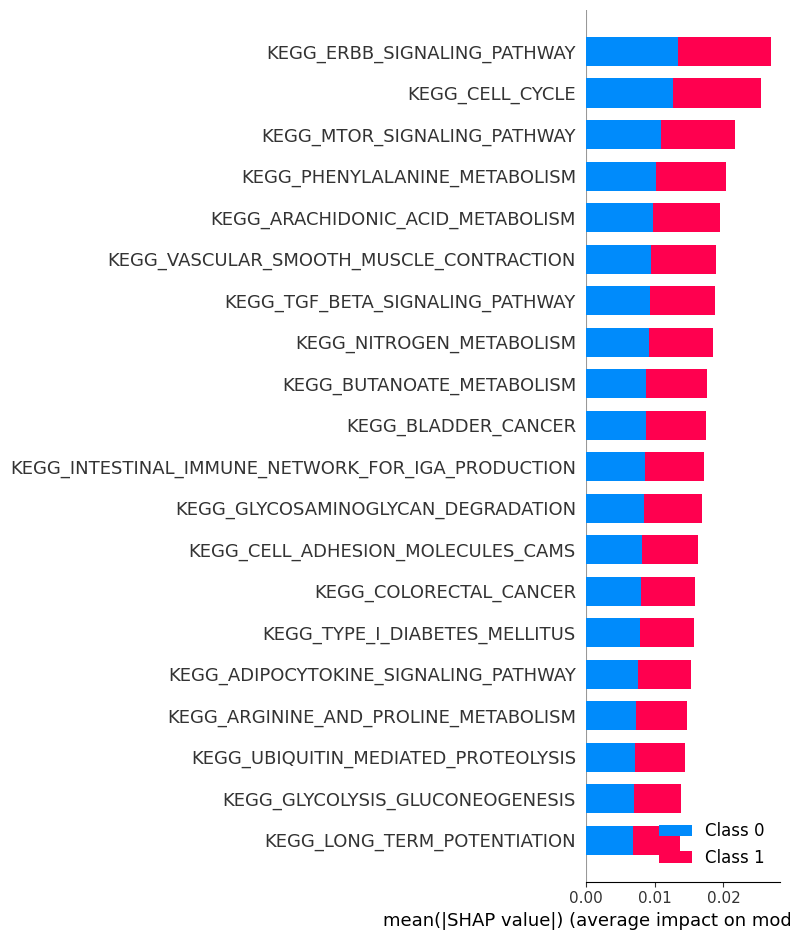

In [ ]:
shap.summary_plot(shaps[1],feature_names=features)

In [ ]:
result0 = pd.read_csv("result.csv", index_col=0)
result0['type'] = 'PINNET'
result1 = pd.read_csv("result2.csv", index_col=0)
result1['type'] = 'new'

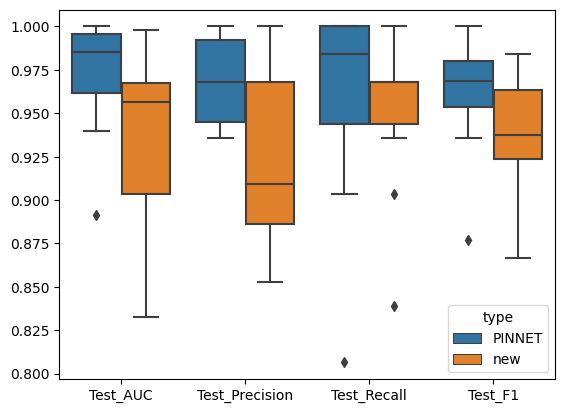

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
perf = pd.concat([result0.iloc[:,-5:],result1.iloc[:,-5:]],axis=0)
df_long = pd.melt(perf, id_vars='type', var_name='Measurement', value_name='Value')
sns.boxplot(x='Measurement', y='Value', hue = 'type', data=df_long)
plt.xlabel('')
plt.ylabel('')
plt.savefig('perf_new.png',dpi=300)

In [ ]:
for i, shap in enumerate(shaps):
  fi = np.mean(np.abs(shap[1]), axis=0)
  if i == 0:
    df = pd.DataFrame({"Feature": features, f'Importance{i+1}': fi})
  else:
    df = pd.concat([df,pd.DataFrame({f'Importance{i+1}': fi})],axis=1)
df

,Feature,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10
0,KEGG_GLYCOLYSIS_GLUCONEOGENESIS,0.001143,0.006948,0.005704,0.002114,0.007102,0.008041,0.002397,0.001233,0.001599,0.001408
1,KEGG_CITRATE_CYCLE_TCA_CYCLE,0.004257,0.002247,0.006624,0.005903,0.000567,0.003546,0.002642,0.002735,0.007013,0.005919
2,KEGG_PENTOSE_PHOSPHATE_PATHWAY,0.001625,0.002024,0.003023,0.008084,0.000723,0.000880,0.017943,0.001544,0.002761,0.002775
3,KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM,0.000735,0.001480,0.007058,0.005942,0.003802,0.000742,0.002681,0.003403,0.002010,0.001247
4,KEGG_GALACTOSE_METABOLISM,0.005930,0.001158,0.003862,0.003951,0.000548,0.000903,0.004918,0.006647,0.004747,0.004883
...,...,...,...,...,...,...,...,...,...,...,...
163,KEGG_PRIMARY_IMMUNODEFICIENCY,0.002490,0.005167,0.001902,0.011832,0.000695,0.000848,0.009953,0.005458,0.004340,0.000761
164,KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,0.004863,0.002443,0.013575,0.004325,0.000533,0.005286,0.006734,0.002696,0.003604,0.007272
165,KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMY...,0.001369,0.002727,0.004499,0.016634,0.001777,0.000675,0.010644,0.001616,0.001802,0.003298
166,KEGG_DILATED_CARDIOMYOPATHY,0.001475,0.004853,0.001078,0.012126,0.005784,0.000998,0.001815,0.002236,0.002232,0.007900


In [ ]:
df['mean'] = df.iloc[:, 1:10].mean(axis=1)
df = df.sort_values(by="mean", ascending=False)
df

,Feature,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10,mean
138,KEGG_PRION_DISEASES,0.003714,0.004006,0.003534,0.043048,0.001340,0.005317,0.004276,0.006834,0.002307,0.008689,0.008264
157,KEGG_NON_SMALL_CELL_LUNG_CANCER,0.002559,0.005660,0.006037,0.023468,0.009335,0.002918,0.003650,0.006008,0.004168,0.008232,0.007089
59,KEGG_BASAL_TRANSCRIPTION_FACTORS,0.002421,0.001466,0.007401,0.014252,0.002983,0.009513,0.014586,0.003256,0.004190,0.005363,0.006674
46,KEGG_RETINOL_METABOLISM,0.001500,0.001104,0.002828,0.027476,0.001084,0.001313,0.017151,0.004453,0.000796,0.003405,0.006412
42,KEGG_BUTANOATE_METABOLISM,0.001375,0.008795,0.006396,0.028324,0.000757,0.000687,0.001304,0.005544,0.001147,0.000996,0.006036
...,...,...,...,...,...,...,...,...,...,...,...,...
44,KEGG_NICOTINATE_AND_NICOTINAMIDE_METABOLISM,0.001655,0.001139,0.004727,0.001184,0.003325,0.002981,0.002936,0.000752,0.002395,0.001527,0.002344
13,KEGG_CYSTEINE_AND_METHIONINE_METABOLISM,0.006770,0.001460,0.000922,0.003091,0.001154,0.000520,0.002333,0.001238,0.001149,0.006536,0.002071
11,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,0.000629,0.001920,0.002199,0.001820,0.003914,0.002781,0.001902,0.001507,0.000915,0.002644,0.001954
111,KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY,0.004092,0.001220,0.001283,0.002768,0.002196,0.001562,0.002026,0.000904,0.001433,0.006401,0.001943


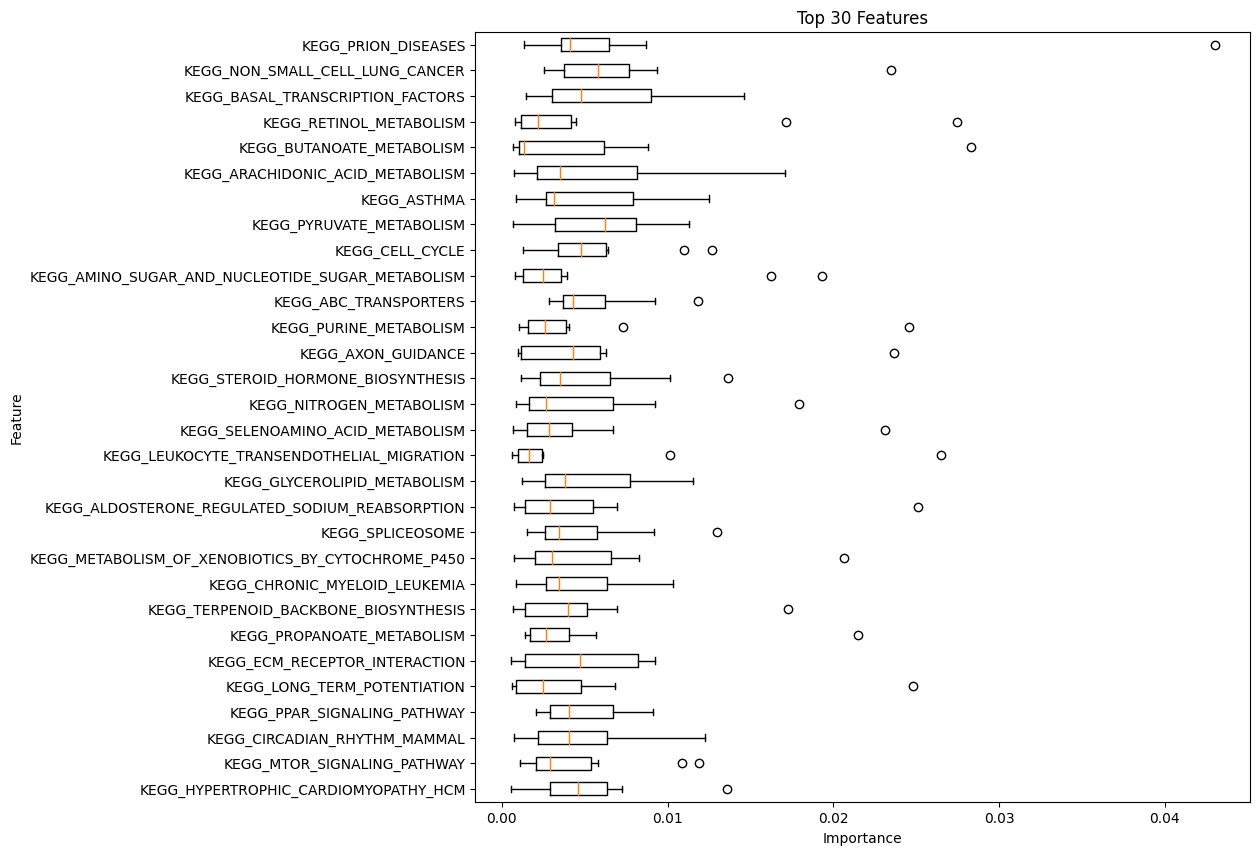

In [ ]:
top30 = df.head(30).iloc[::-1]
top30.set_index('Feature', inplace=True)
plt.figure(figsize=(10, 10))
plt.boxplot(top30.iloc[:,:10].T.values, labels=top30.index,vert=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Features')
plt.savefig('top_30_path.png',dpi=300)